In [1]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
data = pd.read_csv('data.csv')

print("data has {} measurements for {} variables".format(*data.shape))
print("\n{}\n...".format(data.head(8)))

data has 5000 measurements for 2 variables

   country  language
0        2         5
1        4         2
2        2         3
3        1         1
4        5         5
5        4         5
6        5         4
7        4         5
...


In [3]:
countries = ['Canada', 'USA', 'England', 'Italy', 'Switzerland']
languages = ['English', 'French', 'Spanish', 'German', 'Italian']

F = pd.crosstab(data.country, data.language, margins=True)
F.index = [*countries, 'col totals']
F.columns = [*languages, 'row totals']

print("{}".format(F))

             English  French  Spanish  German  Italian  row totals
Canada           688     280       10      11       11        1000
USA              730      31      190       8       41        1000
England          798      74       38      31       59        1000
Italy             17      13       11      15      944        1000
Switzerland       15     222       20     648       95        1000
col totals      2248     620      269     713     1150        5000


In [4]:
F = pd.crosstab(data.country, data.language, margins=False)
F.index = countries
F.columns = languages

chisq_stat, p_value, dof, E = scipy.stats.chi2_contingency(F)

print('Results of Chi-squared test of independence\n')
print('  Chi-squared test statistic: {:02.2F}'.format(chisq_stat))
print('  degrees of freedom: {}'.format(dof))
print('  p-value: {:02.6F}'.format(p_value))

Results of Chi-squared test of independence

  Chi-squared test statistic: 7338.94
  degrees of freedom: 16
  p-value: 0.000000


In [5]:
print('matrix of observations F:\n\n{}'.format(F))

matrix of observations F:

             English  French  Spanish  German  Italian
Canada           688     280       10      11       11
USA              730      31      190       8       41
England          798      74       38      31       59
Italy             17      13       11      15      944
Switzerland       15     222       20     648       95


In [6]:
P = F / F.sum().sum()

print('correspondence matrix P:\n\n{}'.format(P))

correspondence matrix P:

             English  French  Spanish  German  Italian
Canada        0.1376  0.0560   0.0020  0.0022   0.0022
USA           0.1460  0.0062   0.0380  0.0016   0.0082
England       0.1596  0.0148   0.0076  0.0062   0.0118
Italy         0.0034  0.0026   0.0022  0.0030   0.1888
Switzerland   0.0030  0.0444   0.0040  0.1296   0.0190


In [7]:
row_centroid = P.sum(axis=1)

print('row centroid (marginal frequency distribution over countries):\n\n{}'.format(row_centroid))

row centroid (marginal frequency distribution over countries):

Canada         0.2
USA            0.2
England        0.2
Italy          0.2
Switzerland    0.2
dtype: float64


In [8]:
col_centroid = P.sum(axis=0)

print('column centroid (marginal frequency distribution over languages):\n\n{}'.format(col_centroid))

column centroid (marginal frequency distribution over languages):

English    0.4496
French     0.1240
Spanish    0.0538
German     0.1426
Italian    0.2300
dtype: float64


In [9]:
row_totals = F.sum(axis=1)

print("row totals (marginal frequency distribution over the countries):\n\n{}".format(row_totals))

row totals (marginal frequency distribution over the countries):

Canada         1000
USA            1000
England        1000
Italy          1000
Switzerland    1000
dtype: int64


In [10]:
col_totals = F.sum(axis=0)

print("column totals (marginal frequency distribution over the languages):\n\n{}".format(col_totals))

column totals (marginal frequency distribution over the languages):

English    2248
French      620
Spanish     269
German      713
Italian    1150
dtype: int64


In [11]:
data = []
for _,row in P.iterrows():
    acc = []
    cntry_i = row.name
    p_iplus = row_centroid.ix[cntry_i]
    for  cntry_k in P.index:
        p_kplus = row_centroid.ix[cntry_k]
        chisqd = np.sqrt(np.sum(np.square(row/p_iplus - P.ix[cntry_k]/p_kplus) / col_centroid))
        acc.append(chisqd)
    data.append(acc)

row2row_chisqd = pd.DataFrame(data, index=P.index, columns=P.index)

print("row-to-row Chi-squared distance table:\n\n{}".format(row2row_chisqd))

row-to-row Chi-squared distance table:

               Canada       USA   England     Italy  Switzerland
Canada       0.000000  1.053631  0.629709  2.315427     1.978023
USA          1.053631  0.000000  0.678054  2.296625     2.203064
England      0.629709  0.678054  0.000000  2.192568     2.054644
Italy        2.315427  2.296625  2.192568  0.000000     2.509498
Switzerland  1.978023  2.203064  2.054644  2.509498     0.000000


In [12]:
PT = P.T

data = []
for _,row in PT.iterrows():
    acc = []
    lang_j = row.name
    p_plusj = col_centroid.ix[lang_j]
    for lang_k in PT.index:
        p_plusk = col_centroid.ix[lang_k]
        chisqd = np.sqrt(np.sum(np.square(row/p_plusj - PT.ix[lang_k]/p_plusk) / row_centroid))
        acc.append(chisqd)
    data.append(acc)

col2col_chisqd = pd.DataFrame(data, index=PT.index, columns=PT.index)

print("column-to-column Chi-squared distance table:\n\n{}".format(col2col_chisqd))

column-to-column Chi-squared distance table:

          English    French   Spanish    German   Italian
English  0.000000  1.174400  1.160320  2.338660  2.157459
French   1.174400  0.000000  1.849170  1.582510  2.140049
Spanish  1.160320  1.849170  0.000000  2.439221  2.309852
German   2.338660  1.582510  2.439221  0.000000  2.572037
Italian  2.157459  2.140049  2.309852  2.572037  0.000000


In [13]:
Mu_ij = row_centroid.values.reshape((P.index.size,1)) * col_centroid.values.reshape((1,P.columns.size))

Lambda = (P - Mu_ij) / np.sqrt(Mu_ij)

print('inertia Lambda:\n\n{}'.format(Lambda))

inertia Lambda:

              English   French   Spanish    German   Italian
Canada       0.159004  0.19812 -0.084450 -0.155852 -0.204219
USA          0.187016 -0.11811  0.262604 -0.159404 -0.176243
England      0.232370 -0.06350 -0.030464 -0.132166 -0.159458
Italy       -0.288528 -0.14097 -0.082522 -0.151114  0.665808
Switzerland -0.289862  0.12446 -0.065169  0.598536 -0.125888


In [14]:
U,S,V = np.linalg.svd(Lambda)

num_sv = np.arange(1,len(S)+1)

cum_var_explained = [np.sum(np.square(S[0:n])) / np.sum(np.square(S)) for n in num_sv]

print('Using first singular value, {:0.3F}% variance explained'.format(cum_var_explained[0]))
print('Using first 2 singular values, {:0.3F}% variance explained'.format(cum_var_explained[1]))
print('Using first 3 singular values, {:0.3F}% variance explained'.format(cum_var_explained[2]))

Using first singular value, 0.506% variance explained
Using first 2 singular values, 0.916% variance explained
Using first 3 singular values, 0.987% variance explained


<IPython.core.display.Javascript object>


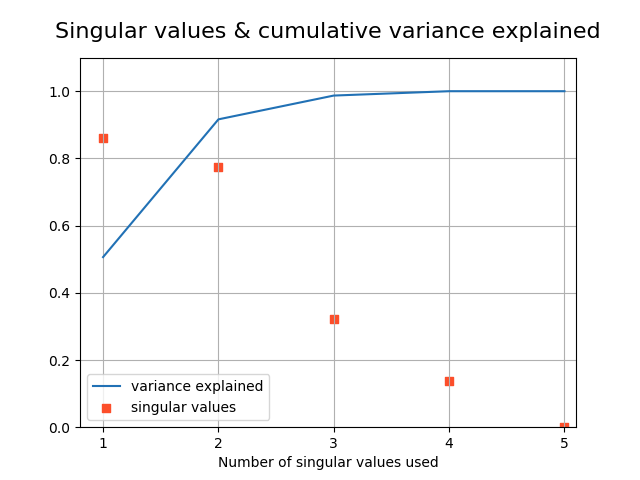

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(num_sv, cum_var_explained, color='#2171b5', label='variance explained')
plt.scatter(num_sv, S, marker='s', color='#fc4e2a', label='singular values')

plt.legend(loc='lower left', scatterpoints=1)

ax.set_xticks(num_sv)
ax.set_xlim([0.8, 5.1])
ax.set_ylim([0.0, 1.1])
ax.set_xlabel('Number of singular values used')
ax.set_title('Singular values & cumulative variance explained',
             fontsize=16,
             y=1.03)

plt.grid()

In [17]:
cntry_x = U[:,0]
cntry_y = U[:,1]
cntry_z = U[:,2]

lang_x = V.T[:,0]
lang_y = V.T[:,1]
lang_z = V.T[:,2]

<IPython.core.display.Javascript object>


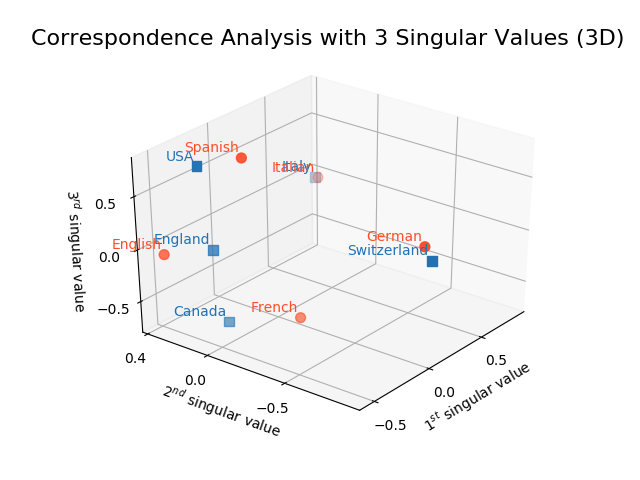

In [18]:
import pylab
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = pylab.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cntry_x, cntry_y, cntry_z, marker='s', s=50, c='#2171b5')
cntry_labels = []
for i,(x,y,z) in enumerate(zip(cntry_x,cntry_y,cntry_z)):
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
    
    label = pylab.annotate(Lambda.index[i],
                          xy=(x2,y2),
                          xytext=(-2,2),
                          textcoords='offset points',
                          ha='right',
                          va='bottom',
                          color='#2171b5')
    cntry_labels.append(label)

ax.scatter(lang_x, lang_y, lang_z, marker='o', s=50, c='#fc4e2a')
lang_labels = []
for i,(x,y,z) in enumerate(zip(lang_x,lang_y,lang_z)):
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
    
    label = pylab.annotate(Lambda.columns[i],
                          xy=(x2,y2),
                          xytext=(-2,2),
                          textcoords='offset points',
                          ha='right',
                          va='bottom',
                          color='#fc4e2a')
    lang_labels.append(label)

def update_position(e):
    for i,(x,y,z) in enumerate(zip(cntry_x,cntry_y,cntry_z)):
        x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
        cntry_labels[i].xy = x2, y2
    for i,(x,y,z) in enumerate(zip(lang_x,lang_y,lang_z)):
        x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
        lang_labels[i].xy = x2, y2
    fig.canvas.draw()
fig.canvas.mpl_connect('button_release_event', update_position)

ax.set_xlabel(r'$1^{st}$ singular value')
ax.set_xticks([-0.5, 0.0, 0.5])
ax.set_ylabel(r'$2^{nd}$ singular value')
ax.set_yticks([-0.5, 0.0, 0.4])
ax.set_zlabel(r'$3^{rd}$ singular value')
ax.set_zticks([-0.5, 0.0, 0.5])
ax.set_title('Correspondence Analysis with 3 Singular Values (3D)',
            fontsize=16,
            y=1.1)

pylab.show()

----

http://www.mathematica-journal.com/2010/09/an-introduction-to-correspondence-analysis/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3718710/

Next we derive the _correspondence matrix_ $P$ from $F$ with

\begin{align}
  P &= \left[ p_{ij} \right] \\
    &= \left[ \frac{f_{ij}}{n} \right] & \text{where } n = \sum_{i=1}^{I} \sum_{j=1}^{J} f_{ij}
\end{align}

----

The $\chi^2$ distances between rows gives us a clue as to how the countries relate to one another in terms of the primary spoken languages.

The $\chi^2$ distance between rows $i$ and $k$ is given by

\begin{align}
 d_{ik} &= \sqrt{\sum_{j=1}^{J} \frac{(p_{ij}/p_{i+} - p_{kj}/p_{k+})^2}{p_{+j}} }
\end{align}

We can see in this row-to-row $\chi^2$ distance table that for the Anglophonic countries, Canada, USA and England should be clustered near one another, while Italy and Switzerland are both separated from the other countries.

Conversely, the $\chi^2$ distances between columns gives us a clue as to how the languages relate to one another in terms of the countries.

The $\chi^2$ distance between columns $j$ and $k$ is given by

\begin{align}
 d_{jk} &= \sqrt{\sum_{i=1}^{I} \frac{(p_{ij}/p_{+j} - p_{kj}/p_{+k})^2}{p_{i+}} }
\end{align}

For the languages, we can see from the column-to-column $\chi^2$ distances that English and Spanish should be closely related, with French somewhere between English and German. Italian, however, should be sitting alone all by itself away from the others.

----

We start with a matrix of _standardized residuals_:

\begin{align}
  \Omega &= \left[ \frac{p_{ij} - \mu_{ij}}{\sqrt{\mu_{ij}}}  \right]
\end{align}